**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Exploración de datos

En esta notebook, vamos a cargar el conjunto de datos de la [competencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

seaborn.set_context('talk')

In [2]:
melb_df = pandas.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Breve estudio del dataset

In [3]:
melb_df.shape

(13580, 21)

In [4]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [5]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Representación de los ejemplos

La tarea sobre la que nos centraremos es **estimar el precio de cada propiedad**, sabiendo el resto de sus características.

El primer paso de todo análisis es realizar una exploración de los datos y analizar las distribuciones de sus variables. Es decir, aplicar las herramientas que hemos estudiado durante la materia anterior, [Análisis y Visualización de Datos](https://diplodatos.famaf.unc.edu.ar/analisis-y-visualizacion-de-datos/). Por este motivo, no entraremos en detalles en esta notebook, sino que será parte de la ejercitación práctica.

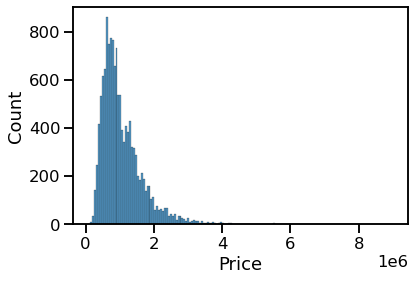

In [6]:
seaborn.histplot(melb_df.Price);

Luego de que tenemos una idea aproximada de la forma y el significado de cada una de las variables en nuestro conjunto de datos, tenemos que comenzar a pensar qué tan útiles son para mi tarea de predicción en particular.

## Fechas

Las fechas representan la variable *tiempo*, que no es trivial de representar en mi conjunto de datos. 

* ¿Cómo afecta el tiempo al fenómeno que quiero estudiar?

**Rta.** El precio de un bien varía a lo largo del tiempo, por lo que es importante considerar esta variable a la hora de predecir precios.

* ¿Es importante de manera absoluta o de manera relativa?

**Rta.** Es importante de manera **relativa** ya que no es el único factor que condiciona el precio de una propiedad.

* ¿Con qué nivel de precisión (o con qué escala) es relevante? ¿Años, días, minutos? ¿Importa la zona horaria?

**Rta.** Depende de muchos factores. Quizás con una precisión de años sea suficiente, aunque para estar seguros deberíamos considerar los meses. La zona horaria no importaría, ya que ignoramos el horario al momento de venta.

Además de estas preguntas conceptuales, tenemos que tener en cuenta con qué tipo de datos (de Python) están representadas estas fechas:

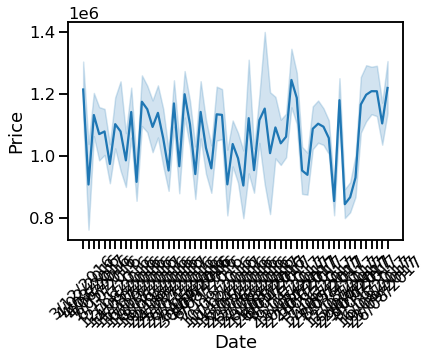

In [7]:
seaborn.lineplot(data=melb_df, x='Date', y='Price')

plt.xticks(rotation=45);

Al leer el dataset, las fechas fueron reconocidas como *strings*. Podemos cambiar el tipo de datos a `datetime`, que es una estructura de datos diseñada para trabajar con fechas hasta una precisión de milisegundos.

In [8]:
melb_df['date'] = pandas.to_datetime(melb_df.Date)

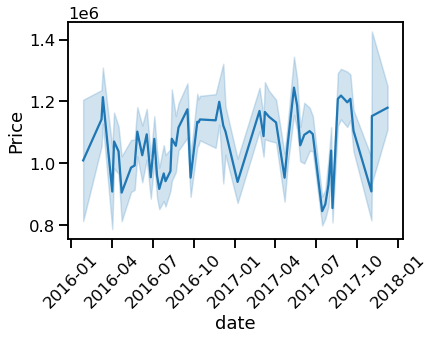

In [9]:
seaborn.lineplot(data=melb_df, x='date', y='Price')

plt.xticks(rotation=45);

Podemos considerar que el día no es importante para este conjunto de datos, y que sólo está aportando ruido.

Para extraer sólo el mes de una fecha, aplicamos una función a cada fila.

In [10]:
melb_df['date_month'] = pandas.to_datetime(melb_df.date.dt.strftime('%Y-%m'))

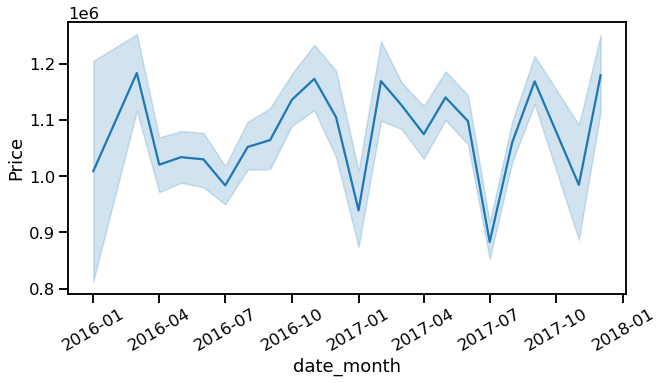

In [11]:
fig = plt.figure(figsize=(10, 5))

seaborn.lineplot(data=melb_df, x='date_month', y='Price')

plt.xticks(rotation=30);

## Ejercicio

En lugar de utilizar una precisión de meses, utilizar cuatrimestres para representar la fecha. Realizar una visualización del cambio de precios con respecto al año y al cuatrimestre.

**Nota** investigue si existe una función en pandas para realizar la actividad.

#### Trimestre

In [12]:
melb_df['quarter'] = melb_df.date.dt.quarter

In [13]:
melb_df.quarter.value_counts()

3    4873
2    4359
4    2329
1    2019
Name: quarter, dtype: int64

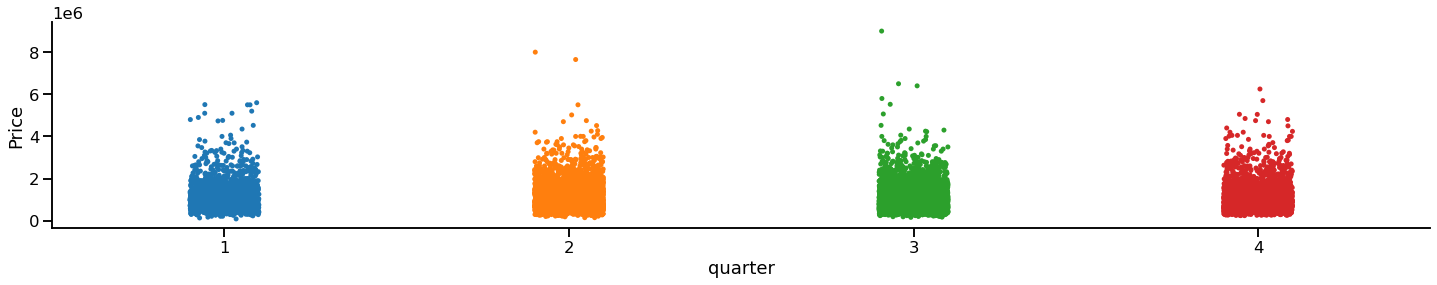

In [14]:
seaborn.catplot(data=melb_df,
                x='quarter',
                y='Price',
                aspect=5, height=4);

#### Año y Trimestre

In [15]:
melb_df['date_quarter'] = melb_df.date.dt.to_period('Q')

In [16]:
melb_df.date_quarter.value_counts()

2017Q3    2693
2017Q2    2521
2016Q3    2180
2016Q2    1838
2016Q4    1820
2017Q1    1521
2017Q4     509
2016Q1     498
Freq: Q-DEC, Name: date_quarter, dtype: int64

In [17]:
# Convierto los períodos a fechas para visualizarlos.
melb_df['date_quarter'] = pandas.to_datetime(melb_df.date_quarter.dt.strftime('%YQ%q'))

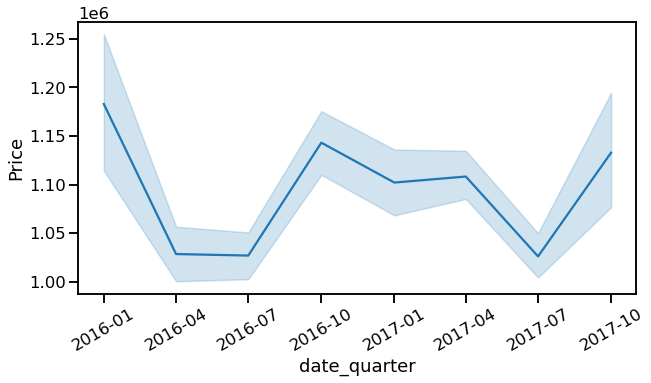

In [18]:
fig = plt.figure(figsize=(10, 5))

seaborn.lineplot(data=melb_df, x='date_quarter', y='Price')

plt.xticks(rotation=30);